In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [191]:
bands = pd.read_csv('bands.csv', index_col='id', )
albums = pd.read_csv('albums.csv', index_col='id')
reviews = pd.read_csv('reviews.csv', index_col='id')

In [192]:
bands['genre'] = bands.genre.str.title().str.replace(' ', '').\
    str.replace(u'\xa0', u'').str.replace(r'\(.*?\)', '').str.replace(r'\||\/', ',')
bands.theme = bands.theme.str.title().str.replace(' ', '').\
    str.replace(u'\xa0', u'').str.replace(r'\(.*?\)', '').str.replace(r'\||\/|\;', ',')

In [193]:
bands.loc[bands.formed_in.dropna().index, 'formed_in'] =\
    pd.to_datetime(bands.formed_in.dropna().astype('int64'), format='%Y')

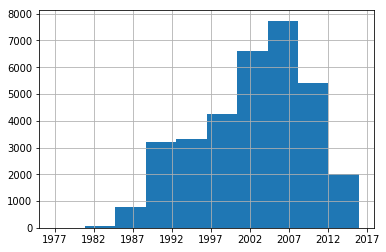

In [194]:
bands.formed_in.hist()
pass

In [214]:
albums.shape

(28069, 3)

In [213]:
reviews.groupby('album')['score'].agg(['min', 'max', 'count', 'mean', 'std', 'median']).shape

(7905, 6)

In [215]:
albums = albums.join(reviews.groupby('album')['score'].agg(['min', 'max', 'count', 'mean', 'std', 'median']))

In [218]:
albums.head()

band                                    title  year   min   max  count  \
id                                                                           
1      1                           Taste the Hate  2014   NaN   NaN    NaN   
2      3                     The Bringer of Death  2014   NaN   NaN    NaN   
3      4  Deception| Calculate What You Can't See  2005   NaN   NaN    NaN   
4      7                              Inti Huacay  1998  0.88  0.88    1.0   
5      7                         Génesis & horror  2002  0.96  0.96    1.0   

    mean  std  median  
id                     
1    NaN  NaN     NaN  
2    NaN  NaN     NaN  
3    NaN  NaN     NaN  
4   0.88  NaN    0.88  
5   0.96  NaN    0.96